In [15]:
import pandas as pd
import matplotlib.pyplot as plt

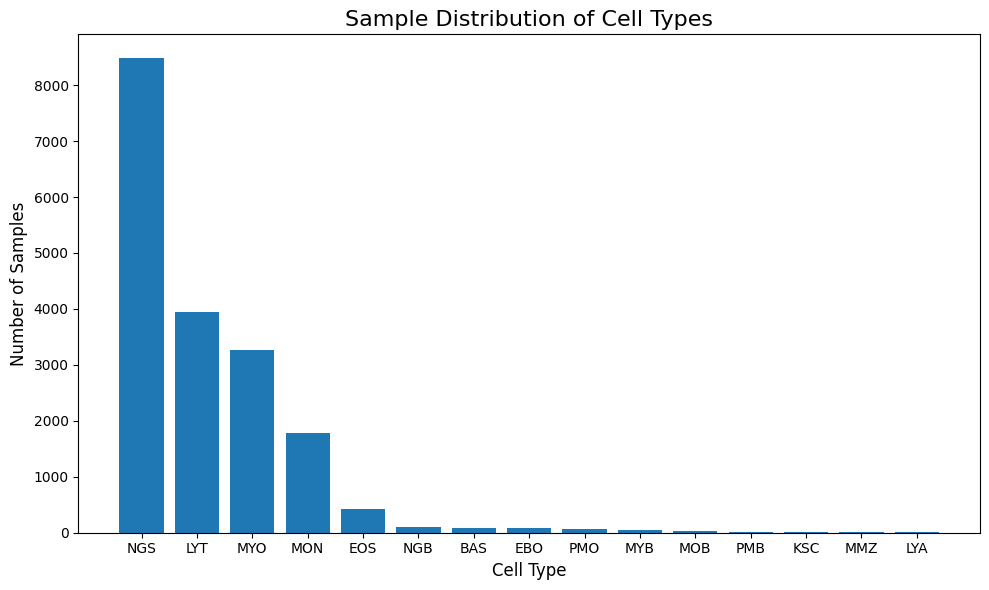

In [16]:
annotations = pd.read_csv('/home/ym62/annotations.csv')
cell_type_counts = annotations['cell types'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(cell_type_counts.index, cell_type_counts.values)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Sample Distribution of Cell Types', fontsize=16)
plt.tight_layout()
plt.show()

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [7]:
# Split data set
# Code reference from the open source website: https://blog.csdn.net/m0_46483236/article/details/117791043
# train_test_split() was used twice to randomly divide the selected data set of fixed size into training set, verification set, and test set according to a certain ratio, such as 8:1:1.
# And the divided data set is written to a fixed directory
 
 
def main():
 
    raw_data_path = '/home/ym62/PKG-AML-Cytomorphology_LMU'
    train_data_path = '/home/ym62/PKG-AML-Cytomorphology_LMU/train'
    validate_data_path = '/home/ym62/PKG-AML-Cytomorphology_LMU/validation'
    test_data_path = '/home/ym62/PKG-AML-Cytomorphology_LMU/test'
 
    subsets = ['BAS', 'EBO', 'EOS', 'KSC', 'LYA', 'LYT', 'MMZ', 'MOB', 'MON', 'MYB', 'MYO', 'NGB', 'NGS', 'PMB', 'PMO']
    train_ratio = 0.8
    val_ratio = 0.1
    test_ratio = 0.1
 
    #line_sen_list = []
    '''
    with open(raw_data_path, 'r', encoding = 'utf-8') as f:
        lines = f.readlines()
        # A fixed size dataset is selected according to a certain pattern
        for line in lines[0:100000]:
            line_sen_list.append(''.join(line))
        f.close()
    
   label_list = [0] * 100000  # Because the data is text and the data and label are together, the label in train_test_split() can give an identically sized list of 0 values with no effect.
   '''
    

    
    for subset in subsets:
        subset_dir = os.path.join(raw_data_path, subset)
        file_names = [f for f in os.listdir(subset_dir) if f.endswith('.tiff')]  # Select only.tiff files
        print(f"Processing subset: {subset}, found {len(file_names)} tiff files.")
        #file_names = os.listdir(subset_dir)
        
        # Data set partitioning
        X_train, X_validate_test = train_test_split(file_names, test_size=0.2, random_state=42)
        X_validate, X_test = train_test_split(X_validate_test, test_size=0.5, random_state=42)

        '''    
        # Move files to the destination folder
        for file_name in X_train:
            src_file = os.path.join(subset_dir, file_name)
            dest_file = os.path.join(train_data_path, file_name)
            if not os.path.exists(train_data_path):
                os.makedirs(train_data_path)
            shutil.move(src_file, dest_file)
            
        for file_name in X_validate:
            src_file = os.path.join(subset_dir, file_name)
            dest_file = os.path.join(validate_data_path, file_name)
            if not os.path.exists(validate_data_path):
                os.makedirs(validate_data_path)
            shutil.move(src_file, dest_file)
            
        for file_name in X_test:
            src_file = os.path.join(subset_dir, file_name)
            dest_file = os.path.join(test_data_path, file_name)
            if not os.path.exists(test_data_path):
                os.makedirs(test_data_path)
            shutil.move(src_file, dest_file)
        '''
        
        train_subset_dir = os.path.join(train_data_path, subset)
        validate_subset_dir = os.path.join(validate_data_path, subset)
        test_subset_dir = os.path.join(test_data_path, subset)

        if not os.path.exists(train_subset_dir):
            os.makedirs(train_subset_dir)
        if not os.path.exists(validate_subset_dir):
            os.makedirs(validate_subset_dir)
        if not os.path.exists(test_subset_dir):
            os.makedirs(test_subset_dir)

        # move file
        for file_name in X_train:
            shutil.move(os.path.join(subset_dir, file_name), os.path.join(train_subset_dir, file_name))
        for file_name in X_validate:
            shutil.move(os.path.join(subset_dir, file_name), os.path.join(validate_subset_dir, file_name))
        for file_name in X_test:
            shutil.move(os.path.join(subset_dir, file_name), os.path.join(test_subset_dir, file_name))

        print(f"{subset} - Training: {len(X_train)} files, Validation: {len(X_validate)} files, Test: {len(X_test)} files")

if __name__ == '__main__':
    main()



Processing subset: BAS, found 79 tiff files.
BAS - Training: 63 files, Validation: 8 files, Test: 8 files
Processing subset: EBO, found 78 tiff files.
EBO - Training: 62 files, Validation: 8 files, Test: 8 files
Processing subset: EOS, found 424 tiff files.
EOS - Training: 339 files, Validation: 42 files, Test: 43 files
Processing subset: KSC, found 15 tiff files.
KSC - Training: 12 files, Validation: 1 files, Test: 2 files
Processing subset: LYA, found 11 tiff files.
LYA - Training: 8 files, Validation: 1 files, Test: 2 files
Processing subset: LYT, found 3937 tiff files.
LYT - Training: 3149 files, Validation: 394 files, Test: 394 files
Processing subset: MMZ, found 15 tiff files.
MMZ - Training: 12 files, Validation: 1 files, Test: 2 files
Processing subset: MOB, found 26 tiff files.
MOB - Training: 20 files, Validation: 3 files, Test: 3 files
Processing subset: MON, found 1789 tiff files.
MON - Training: 1431 files, Validation: 179 files, Test: 179 files
Processing subset: MYB, fou

In [8]:
import os
import shutil
#from torch.utils.data import ConcatDataset
#from torchvision import datasets

In [9]:


# Define the data set path
train_data_path = '/home/ym62/PKG-AML-Cytomorphology_LMU/train'
validate_data_path = '/home/ym62/PKG-AML-Cytomorphology_LMU/validation'
test_data_path = '/home/ym62/PKG-AML-Cytomorphology_LMU/test'

# Define the path of the merged data set
new_train_data_path = '/home/ym62/Group_Classification/train'
new_validate_data_path = '/home/ym62/Group_Classification/validation'
new_test_data_path = '/home/ym62/Group_Classification/test'

# Merge and move files
def move_files(old_class_list, new_class_name, data_path, new_data_path):
    new_class_path = os.path.join(new_data_path, new_class_name)
    os.makedirs(new_class_path, exist_ok=True)
    for old_class in old_class_list:
        old_class_path = os.path.join(data_path, old_class)
        for file_name in os.listdir(old_class_path):
            shutil.move(os.path.join(old_class_path, file_name), os.path.join(new_class_path, file_name))

'''
# Merge training set MLO categories
datasets_list = []
for cls in ['BAS', 'EOS', 'LYA', 'LYT', 'NGB', 'NGS', 'MON']:
    old_class_path = os.path.join(train_data_path, cls)
    dataset = datasets.ImageFolder(root=old_class_path)
    datasets_list.append(dataset)
combined_dataset = ConcatDataset(datasets_list)

# Save to new path
new_class_path = os.path.join(new_train_data_path, 'MLO')
os.makedirs(new_class_path, exist_ok=True)
for i, (image, _) in enumerate(combined_dataset):
    save_path = os.path.join(new_class_path, f"{i}.tiff")
    image.save(save_path)

# Merge validation set MLO categories
datasets_list = []
for cls in ['BAS', 'EOS', 'LYA', 'LYT', 'NGB', 'NGS', 'MON']:
    old_class_path = os.path.join(validate_data_path, cls)
    dataset = datasets.ImageFolder(root=old_class_path)
    datasets_list.append(dataset)
combined_dataset = ConcatDataset(datasets_list)

# Save to new path
new_class_path = os.path.join(new_validate_data_path, 'MLO')
os.makedirs(new_class_path, exist_ok=True)
for i, (image, _) in enumerate(combined_dataset):
    save_path = os.path.join(new_class_path, f"{i}.tiff")
    image.save(save_path)

# Merge test set MLO categories
datasets_list = []
for cls in ['BAS', 'EOS', 'LYA', 'LYT', 'NGB', 'NGS', 'MON']:
    old_class_path = os.path.join(test_data_path, cls)
    dataset = datasets.ImageFolder(root=old_class_path)
    datasets_list.append(dataset)
combined_dataset = ConcatDataset(datasets_list)

# Save to new path
new_class_path = os.path.join(new_test_data_path, 'MLO')
os.makedirs(new_class_path, exist_ok=True)
for i, (image, _) in enumerate(combined_dataset):
    save_path = os.path.join(new_class_path, f"{i}.tiff")
    image.save(save_path)

# A similar treatment can be used for the LLO and KSC categories
# Merge the training set, validation set, and test set of the LLO class
datasets_list = []
for cls in ['EBO', 'MOB', 'MYO', 'MMZ', 'MYB', 'PMB', 'PMO']:
    old_class_path = os.path.join(train_data_path, cls)
    dataset = datasets.ImageFolder(root=old_class_path)
    datasets_list.append(dataset)
combined_dataset = ConcatDataset(datasets_list)

# Save to new path
new_class_path = os.path.join(new_train_data_path, 'LLO')
os.makedirs(new_class_path, exist_ok=True)
for i, (image, _) in enumerate(combined_dataset):
    save_path = os.path.join(new_class_path, f"{i}.tiff")
    image.save(save_path)

# Merge validation set LLO categories
datasets_list = []
for cls in ['EBO', 'MOB', 'MYO', 'MMZ', 'MYB', 'PMB', 'PMO']:
    old_class_path = os.path.join(validate_data_path, cls)
    dataset = datasets.ImageFolder(root=old_class_path)
    datasets_list.append(dataset)
combined_dataset = ConcatDataset(datasets_list)

# Save to new path
new_class_path = os.path.join(new_validate_data_path, 'LLO')
os.makedirs(new_class_path, exist_ok=True)
for i, (image, _) in enumerate(combined_dataset):
    save_path = os.path.join(new_class_path, f"{i}.tiff")
    image.save(save_path)

# Merge test set LLO categories
datasets_list = []
for cls in ['EBO', 'MOB', 'MYO', 'MMZ', 'MYB', 'PMB', 'PMO']:
    old_class_path = os.path.join(test_data_path, cls)
    dataset = datasets.ImageFolder(root=old_class_path)
    datasets_list.append(dataset)
combined_dataset = ConcatDataset(datasets_list)

# Save to new path
new_class_path = os.path.join(new_test_data_path, 'LLO')
os.makedirs(new_class_path, exist_ok=True)
for i, (image, _) in enumerate(combined_dataset):
    save_path = os.path.join(new_class_path, f"{i}.tiff")
    image.save(save_path)

# Move train data for the KSC category
old_class_path = os.path.join(train_data_path, 'KSC')
new_class_path = os.path.join(new_train_data_path, 'KSC')
os.makedirs(new_class_path, exist_ok=True)
for file_name in os.listdir(old_class_path):
    shutil.move(os.path.join(old_class_path, file_name), os.path.join(new_class_path, file_name))

# Move validation data for the KSC category
old_class_path = os.path.join(validate_data_path, 'KSC')
new_class_path = os.path.join(new_validate_data_path, 'KSC')
os.makedirs(new_class_path, exist_ok=True)
for file_name in os.listdir(old_class_path):
    shutil.move(os.path.join(old_class_path, file_name), os.path.join(new_class_path, file_name))

# Move test data for the KSC category
old_class_path = os.path.join(test_data_path, 'KSC')
new_class_path = os.path.join(new_test_data_path, 'KSC')
os.makedirs(new_class_path, exist_ok=True)
for file_name in os.listdir(old_class_path):
    shutil.move(os.path.join(old_class_path, file_name), os.path.join(new_class_path, file_name))

'''

# Merge MLO classes
move_files(['BAS', 'EOS', 'LYA', 'LYT', 'NGB', 'NGS', 'MON'], 'MLO', train_data_path, new_train_data_path)
move_files(['BAS', 'EOS', 'LYA', 'LYT', 'NGB', 'NGS', 'MON'], 'MLO', validate_data_path, new_validate_data_path)
move_files(['BAS', 'EOS', 'LYA', 'LYT', 'NGB', 'NGS', 'MON'], 'MLO', test_data_path, new_test_data_path)

# Merge the LLO classes
move_files(['EBO', 'MOB', 'MYO', 'MMZ', 'MYB', 'PMB', 'PMO'], 'LLO', train_data_path, new_train_data_path)
move_files(['EBO', 'MOB', 'MYO', 'MMZ', 'MYB', 'PMB', 'PMO'], 'LLO', validate_data_path, new_validate_data_path)
move_files(['EBO', 'MOB', 'MYO', 'MMZ', 'MYB', 'PMB', 'PMO'], 'LLO', test_data_path, new_test_data_path)

# Move the KSC class
move_files(['KSC'], 'KSC', train_data_path, new_train_data_path)
move_files(['KSC'], 'KSC', validate_data_path, new_validate_data_path)
move_files(['KSC'], 'KSC', test_data_path, new_test_data_path)

# Output the merged data condition
for subset in ['MLO', 'LLO', 'KSC']:
    train_files = os.listdir(os.path.join(new_train_data_path, subset))
    val_files = os.listdir(os.path.join(new_validate_data_path, subset))
    test_files = os.listdir(os.path.join(new_test_data_path, subset))

    print(f"{subset} - Training: {len(train_files)} files, Validation: {len(val_files)} files, Test: {len(test_files)} files")


MLO - Training: 11864 files, Validation: 1483 files, Test: 1486 files
LLO - Training: 2811 files, Validation: 352 files, Test: 354 files
KSC - Training: 12 files, Validation: 1 files, Test: 2 files


In [11]:
import os
import cv2
import numpy as np
import random

In [13]:
# Method reference from: https://blog.csdn.net/m0_37833142/article/details/106304283


# LLO class augment
input_dir = '/home/ym62/Group_Classification/train/LLO'
current_images = os.listdir(input_dir)
current_count = len(current_images)
target_count = 11864
i = 0

while current_count < target_count:
    img_name = random.choice(current_images)
    img_path = os.path.join(input_dir, img_name)
    
    img = cv2.imread(img_path)
    if img is None:
        continue

    # Enhancement method selection and application
    method = random.choice(['flip_horizontal', 'flip_vertical', 'rotate'])

    if method == 'flip_horizontal':
        augmented_img = cv2.flip(img, 1)  # flip horizontal
    elif method == 'flip_vertical':
        augmented_img = cv2.flip(img, 0)  # flip vertical
    else:
        angle = random.randint(0, 359)  # Choose the rotation Angle at random
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        augmented_img = cv2.warpAffine(img, M, (w, h))
    
    # Save the enhanced image
    new_img_name = f"augmented_{i}_{img_name}"
    cv2.imwrite(os.path.join(input_dir, new_img_name), augmented_img)
    i += 1
    current_count += 1
    print(f"Generated {new_img_name}, total count: {current_count}")

print("The LLO class augment is complete")

# KSC category augment
input_dir = '/home/ym62/Group_Classification/train/KSC'
current_images = os.listdir(input_dir)
current_count = len(current_images)
target_count = 11864
i = 0

while current_count < target_count:
    img_name = random.choice(current_images)
    img_path = os.path.join(input_dir, img_name)
    
    img = cv2.imread(img_path)
    if img is None:
        continue

    # Enhancement method selection and application
    method = random.choice(['flip_horizontal', 'flip_vertical', 'rotate'])

    if method == 'flip_horizontal':
        augmented_img = cv2.flip(img, 1)  # flip horizontal
    elif method == 'flip_vertical':
        augmented_img = cv2.flip(img, 0)  # flip vertical
    else:
        angle = random.randint(0, 359)  # Choose the rotation Angle at random
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        augmented_img = cv2.warpAffine(img, M, (w, h))
    
    # Save the enhanced image
    new_img_name = f"augmented_{i}_{img_name}"
    cv2.imwrite(os.path.join(input_dir, new_img_name), augmented_img)
    i += 1
    current_count += 1
    print(f"Generated {new_img_name}, total count: {current_count}")

print("KSC category augment complete")


Generated augmented_0_MYO_2869.tiff, total count: 2812
Generated augmented_1_MYO_3148.tiff, total count: 2813
Generated augmented_2_MYO_1492.tiff, total count: 2814
Generated augmented_3_MYO_2958.tiff, total count: 2815
Generated augmented_4_MYO_2561.tiff, total count: 2816
Generated augmented_5_MYB_0040.tiff, total count: 2817
Generated augmented_6_MYO_3016.tiff, total count: 2818
Generated augmented_7_MYO_0090.tiff, total count: 2819
Generated augmented_8_PMO_0051.tiff, total count: 2820
Generated augmented_9_MYO_0030.tiff, total count: 2821
Generated augmented_10_MYO_2730.tiff, total count: 2822
Generated augmented_11_MYO_1158.tiff, total count: 2823
Generated augmented_12_MYO_1968.tiff, total count: 2824
Generated augmented_13_MYO_1307.tiff, total count: 2825
Generated augmented_14_MYO_2621.tiff, total count: 2826
Generated augmented_15_EBO_0007.tiff, total count: 2827
Generated augmented_16_MYO_0981.tiff, total count: 2828
Generated augmented_17_MYO_0553.tiff, total count: 2829
Ge

In [14]:

# Count the number of files in the LLO
num_files = len(os.listdir('/home/ym62/Group_Classification/train/LLO'))

# Print the number of files
print(f"The number of images in LLO train set is: {num_files}")

The number of images in LLO train set is: 11864
